<a href="https://colab.research.google.com/github/exphon/exphon2026/blob/main/Parselmouth_Tutorial_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parselmouth 튜토리얼

이 노트북은 **슬라이드**: `Parselmouth_Colab_LJSpeech_Tutorial_StepByStep_DriveData.pptx` 와 **Step 번호가 1:1로 대응**합니다.

## 전제
- 로컬 컴퓨터의 `/data` 폴더에 아래 10개 파일이 있습니다.
  - `LJ001-0001.wav` ~ `LJ001-0005.wav`
  - `LJ001-0001.TextGrid` ~ `LJ001-0005.TextGrid`
- 이 `/data` 폴더를 **Google Drive**로 업로드합니다. (예: `MyDrive/parselmouth_tutorial/data/`)
- Colab에서 Drive를 마운트해서 분석합니다.

> 💡 진행 방법: 위에서 아래로 **셀을 순서대로 실행**하세요.  
> 에러가 나면: **바로 위 셀부터** 다시 실행하면 해결되는 경우가 많습니다.


## Step 0) 필요한 패키지 설치

In [1]:
!pip -q install praat-parselmouth
!pip -q install tgt pandas matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.0 MB/s eta 0:00:00


## Step 2) Drive에 업로드한 data 폴더 경로 지정

⚠️ 아래 `DATA_DIR`는 여러분이 Drive에 업로드한 위치에 맞게 수정해야 합니다.


In [ ]:
# 터미널에서
# mkdir data
# mv *.wav data
# mv *.TextGrid data

In [ ]:
import os

# 예시: MyDrive/parselmouth_tutorial/data
# 이 경로는 Google Drive에 업로드한 실제 폴더 경로로 수정해야 합니다.
LOCAL_DIR = '.'

print('exists?', os.path.isdir(LOCAL_DIR))
if os.path.isdir(LOCAL_DIR):
    all_files = os.listdir(LOCAL_DIR)
    # .wav와 .TextGrid 파일만 필터링
    filtered_files = [f for f in all_files if f.endswith('.wav') or f.endswith('.TextGrid')]
    print('files:', len(filtered_files))
    print(sorted(filtered_files)[:10])

exists? True
files: 0
[]


In [ ]:
# 이 셀은 이미 drive.mount('/content/drive')가 있으므로 불필요합니다. 제거하거나 주석 처리합니다.

In [ ]:
import shutil
import os

# Define the local target directory, typically named 'data'
DATA_DIR = "./data/"

# Ensure DATA_DIR is used as the source for files to be moved
# From the overall notebook context, DATA_DIR is currently '.' (the /content/ directory)
source_data_dir = LOCAL_DIR

# Remove the target DATA_DIR directory if it already exists to ensure a clean state
#if os.path.exists(DATA_DIR):
#    shutil.rmtree(DATA_DIR)

# Create the new DATA_DIR directory
#os.makedirs(DATA_DIR, exist_ok=True)

print(f"Moving .wav and .TextGrid files from '{source_data_dir}' to '{DATA_DIR}'...")

moved_count = 0
# List files in the source_data_dir and filter for .wav and .TextGrid
for filename in os.listdir(source_data_dir):
    if filename.endswith('.wav') or filename.endswith('.TextGrid'):
        src_path = os.path.join(source_data_dir, filename)
        dst_path = os.path.join(DATA_DIR, filename)

        # Ensure the source file actually exists before attempting to move
        if os.path.isfile(src_path):
            shutil.move(src_path, dst_path)
            moved_count += 1
        else:
            print(f"Warning: Source file not found, skipping: {src_path}")

print(f'Successfully moved {moved_count} files.')
print('Files now in LOCAL_DATA:', len(os.listdir(DATA_DIR)))
print(sorted(os.listdir(DATA_DIR))[:10])

Moving .wav and .TextGrid files from '.' to './data/'...
Successfully moved 0 files.
Files now in LOCAL_DATA: 10
['LJ001-0001.TextGrid', 'LJ001-0001.wav', 'LJ001-0002.TextGrid', 'LJ001-0002.wav', 'LJ001-0003.TextGrid', 'LJ001-0003.wav', 'LJ001-0004.TextGrid', 'LJ001-0004.wav', 'LJ001-0005.TextGrid', 'LJ001-0005.wav']


## Step 4) 5쌍 파일이 제대로 있는지 확인

## Step 5) 샘플 1개 재생해보기

## Step 6) import & phone tier 자동 선택 함수

## Step 9) 한 phone 구간에서 값 뽑기 (midpoint)

In [ ]:
itv = phone_tier[5]
mid = itv.start_time + (itv.end_time - itv.start_time)/2

dur_ms = (itv.end_time - itv.start_time) * 1000
f0  = call(pitch,     'Get value at time', mid, 'Hertz', 'Linear')
amp = call(intensity, 'Get value at time', mid, 'cubic')
f1  = call(formant,   'Get value at time', 1, mid, 'Hertz', 'Linear')
f2  = call(formant,   'Get value at time', 2, mid, 'Hertz', 'Linear')
f3  = call(formant,   'Get value at time', 3, mid, 'Hertz', 'Linear')

print(itv.text, f'{dur_ms:.1f}ms', f0, amp, f1, f2, f3)


IH0 150.0ms 178.28891382670977 76.74687010439837 524.9467947950468 2344.6505414455974 2943.1378045736046


## Step 10) 한 파일(phone 전부)을 표(DataFrame)로 만들기

In [ ]:
rows = []
for itv in phone_tier:
    mid = itv.start_time + (itv.end_time - itv.start_time)/2
    dur_ms = (itv.end_time - itv.start_time) * 1000
    f0  = call(pitch,     'Get value at time', mid, 'Hertz', 'Linear')
    amp = call(intensity, 'Get value at time', mid, 'cubic')
    f1  = call(formant,   'Get value at time', 1, mid, 'Hertz', 'Linear')
    f2  = call(formant,   'Get value at time', 2, mid, 'Hertz', 'Linear')
    f3  = call(formant,   'Get value at time', 3, mid, 'Hertz', 'Linear')
    rows.append([itv.text, itv.start_time, itv.end_time, dur_ms, f0, amp, f1, f2, f3])

df = pd.DataFrame(rows, columns=['phone','start','end','dur_ms','f0','intensity','f1','f2','f3'])
df.head()


,phone,start,end,dur_ms,f0,intensity,f1,f2,f3
0,P,0.00,0.04,40.0,NaN,NaN,827.963195,1799.231531,2608.890288
1,R,0.04,0.07,30.0,203.798026,72.824329,568.404147,1661.789531,2805.760871
2,IH1,0.07,0.19,120.0,217.927276,79.672125,480.280399,2019.871003,2816.923572
3,N,0.19,0.22,30.0,211.022929,69.667211,448.215061,2163.195822,3003.555216
4,T,0.22,0.30,80.0,NaN,69.370634,493.719365,2230.016446,3464.907249


# Back to the main point

In [14]:
import parselmouth
from parselmouth.praat import call
import glob, re, tgt

# 파일 하나만
for tg_file in glob.glob("data/*1.TextGrid"):
    print(f"Processing... {tg_file}")

    dir_name = tg_file.split("/")[:-1]
    tg_name = tg_file.split("/")[-1]
    wav_name = re.sub("TextGrid", "wav", tg_name)

    tg = tgt.read_textgrid(tg_file)
    print(tg.get_tier_names())

    phn_tier = tg.get_tier_by_name('phones')
    wrd_tier = tg.get_tier_by_name('words')

    overlap_tier = tgt.util.get_overlapping_intervals(phn_tier, wrd_tier)

    # Parselmouth에서 Praat을 통제하여 음성 자질 추출하기
    wave_full_name = str(dir_name[0]) + '/' + wav_name
    sound = parselmouth.Sound(wave_full_name)

    pitchobj = call(sound, "To Pitch", 0.01, 75, 300)

    print(wave_full_name)
    print('idx','\t','phn','\t','word','\t','start','\t','end','\t','dur')
    for i, t in enumerate(overlap_tier):
        # 처음 10개만
        if i > 10: break
        texts = t.text.split("+")
        phone = texts[0]
        word = texts[1]
        duration = (t.end_time-t.start_time)*1000  # milliseconds
        mid_time = t.start_time + (t.end_time - t.start_time)/2

        pitchvalue = call(pitchobj, "Get value at time", mid_time, "Hertz", "Linear")

        print(f"{i}",'\t',f"{phone}",'\t',f"{word}",'\t',f"{t.start_time}",'\t',f"{t.end_time}",'\t',f"{duration:.1f}",'\t',f"{pitchvalue:.1f}")
        #print(t.end_time)

        #print(texts[0])
        #print(texts[1])

Processing... data/LJ001-0001.TextGrid
['words', 'phones']
data/LJ001-0001.wav
idx 	 phn 	 word 	 start 	 end 	 dur
0 	 P 	 printing 	 0.0 	 0.04 	 40.0 	 nan
1 	 R 	 printing 	 0.04 	 0.07 	 30.0 	 203.8
2 	 IH1 	 printing 	 0.07 	 0.19 	 120.0 	 217.9
3 	 N 	 printing 	 0.19 	 0.22 	 30.0 	 211.0
4 	 T 	 printing 	 0.22 	 0.3 	 80.0 	 nan
5 	 IH0 	 printing 	 0.3 	 0.45 	 150.0 	 178.3
6 	 NG 	 printing 	 0.45 	 0.68 	 230.0 	 174.3
7 	 IH1 	 in 	 0.79 	 0.94 	 150.0 	 nan
8 	 N 	 in 	 0.94 	 1.0 	 60.0 	 189.7
9 	 DH 	 the 	 1.0 	 1.04 	 40.0 	 180.9
10 	 IY0 	 the 	 1.04 	 1.16 	 120.0 	 182.0


In [ ]:
import parselmouth
from parselmouth.praat import call
import glob, re, tgt

# 파일 하나만
for tg_file in glob.glob("data/*1.TextGrid"):
    print(f"Processing... {tg_file}")

    dir_name = tg_file.split("/")[:-1]
    tg_name = tg_file.split("/")[-1]
    wav_name = re.sub("TextGrid", "wav", tg_name)

    tg = tgt.read_textgrid(tg_file)
    print(tg.get_tier_names())

    phn_tier = tg.get_tier_by_name('phones')
    wrd_tier = tg.get_tier_by_name('words')

    overlap_tier = tgt.util.get_overlapping_intervals(phn_tier, wrd_tier)

    # Parselmouth에서 Praat을 통제하여 음성 자질 추출하기
    wave_full_name = str(dir_name[0]) + '/' + wav_name
    sound = parselmouth.Sound(wave_full_name)

    pitchobj = call(sound, "To Pitch", 0.01, 75, 300)

    print(wave_full_name)
    print('idx','\t','phn','\t','word','\t','start','\t','end','\t','dur')
    for i, t in enumerate(overlap_tier):
        # 처음 10개만
        if i > 10: break
        texts = t.text.split("+")
        phone = texts[0]
        word = texts[1]
        duration = (t.end_time-t.start_time)*1000  # milliseconds
        mid_time = t.start_time + (t.end_time - t.start_time)/2

        pitchvalue = call(pitchobj, "Get value at time", mid_time, "Hertz", "Linear")

        print(f"{i}",'\t',f"{phone}",'\t',f"{word}",'\t',f"{t.start_time}",'\t',f"{t.end_time}",'\t',f"{duration:.1f}",'\t',f"{pitchvalue:.1f}")
        #print(t.end_time)

        #print(texts[0])
        #print(texts[1])

## Step 11) 5개 파일 batch: file별 phone feature 합치기

In [2]:
all_rows = []

for wav_path in wav_files:
    base = os.path.splitext(os.path.basename(wav_path))[0]
    tg_path = os.path.join(LOCAL_DATA, base + '.TextGrid')

    tg = tgt.read_textgrid(tg_path)
    phone_tier, _ = pick_phone_tier(tg)

    sound = parselmouth.Sound(wav_path)
    pitch = sound.to_pitch(time_step=0.01, pitch_floor=75, pitch_ceiling=300)
    intensity = call(sound, 'To Intensity', 100, 0, True)
    formant   = call(sound, 'To Formant (burg)', 0, 5, 5500, 0.005, 50)


    for itv in phone_tier:
        mid = itv.start_time + (itv.end_time - itv.start_time)/2
        dur_ms = (itv.end_time - itv.start_time) * 1000
        f0  = call(pitch,     'Get value at time', mid, 'Hertz', 'Linear')
        amp = call(intensity, 'Get value at time', mid, 'cubic')
        f1  = call(formant,   'Get value at time', 1, mid, 'Hertz', 'Linear')
        f2  = call(formant,   'Get value at time', 2, mid, 'Hertz', 'Linear')
        f3  = call(formant,   'Get value at time', 3, mid, 'Hertz', 'Linear')
        all_rows.append([base, itv.text, itv.start_time, itv.end_time, dur_ms, f0, amp, f1, f2, f3])

df_all = pd.DataFrame(all_rows, columns=['file','phone','start','end','dur_ms','f0','intensity','f1','f2','f3'])
df_all.head()


NameError: name 'wav_files' is not defined

## Step 12) CSV 저장 (Drive로)

In [ ]:
OUT_CSV = '/content/lj5_parselmouth_features.csv'
df_all.to_csv(OUT_CSV, index=False)
print('saved:', OUT_CSV)


saved: /content/lj5_phone_features.csv


## 보너스) pitch track 간단히 보기(검증용)

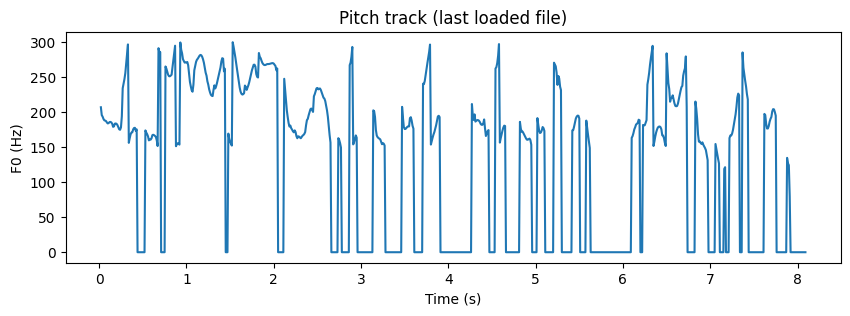

In [ ]:
import matplotlib.pyplot as plt
times = pitch.xs()
f0 = pitch.selected_array['frequency']

plt.figure(figsize=(10,3))
plt.plot(times, f0)
plt.xlabel('Time (s)'); plt.ylabel('F0 (Hz)')
plt.title('Pitch track (last loaded file)')
plt.show()


## Resources

- [Praat Scripting Tutorial by Tae-Jin Yoon](https://github.com/exphon/UKSK2022)
- [IMPRS-2022-Parselmouth-tutorial by Yannick Jadoul](https://github.com/YannickJadoul/IMPRS-2022-Parselmouth-tutorial/blob/main/Tutorial.ipynb)